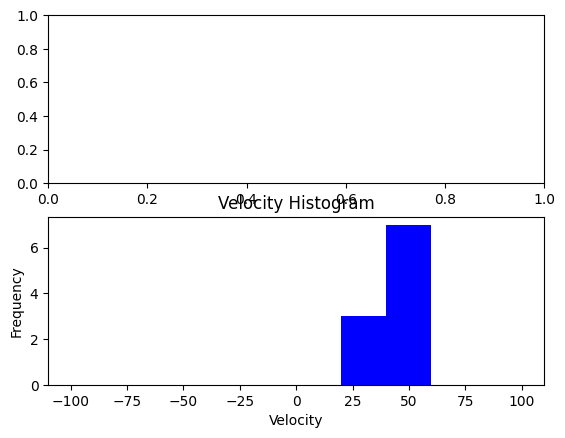

SystemExit: 

In [3]:
import math
import random
import pygame
from pygame.locals import *
from sys import exit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
FPS = 120
dt = 1 / FPS
altura_caixa = 400
largura_caixa = 400
num_particulas = 10
max_data_points = 100

# Colors
WHITE = (255, 255, 255)

class Particula:
    def __init__(self, massa, raio, vel_x, vel_y, x, y, cor):
        self.massa = float(massa)
        self.raio = float(raio)
        self.vel_x = float(vel_x)
        self.vel_y = float(vel_y)
        self.x = float(x)
        self.y = float(y)
        self.cor = cor

    def deslocar(self):
        self.x += self.vel_x * dt
        self.y += self.vel_y * dt

        # Colisao parede
        if self.x < self.raio or self.x > largura_caixa - self.raio:
            self.vel_x *= -1
        if self.y < self.raio or self.y > altura_caixa - self.raio:
            self.vel_y *= -1

def check_collision(p1, p2):
    distance = math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
    if distance <= p1.raio + p2.raio:
        return True
    else:
        return False

def resolve_collision(p1, p2):
    x1 = np.array([p1.x, p1.y])
    x2 = np.array([p2.x, p2.y])

    v1 = np.array([p1.vel_x, p1.vel_y])
    v2 = np.array([p2.vel_x, p2.vel_y])

    new_v1 = v1 - (((2 * p2.massa) / (p1.massa + p2.massa)) * ((np.dot((v1 - v2), (x1 - x2))) / ((np.linalg.norm(x1 - x2))**2)) * (x1 - x2))
    new_v2 = v2 - (((2 * p1.massa) / (p1.massa + p2.massa)) * ((np.dot((v2 - v1), (x2 - x1))) / ((np.linalg.norm(x2 - x1))**2)) * (x2 - x1))

    p1.vel_x = new_v1[0]
    p1.vel_y = new_v1[1]
    p2.vel_x = new_v2[0]
    p2.vel_y = new_v2[1]

def gerar_particula(n_particulas, largura_caixa, altura_caixa):
    particulas = {}
    for particle_index in range(1, n_particulas + 1):
        massa = 10
        raio = 10
        vel_x = random.uniform(-50, 50)
        vel_y = random.uniform(-50, 50)
        x = random.uniform(raio, largura_caixa - raio)
        y = random.uniform(raio, altura_caixa - raio)
        cor = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        nome_particula = f"particula_{particle_index}" 
        particle_instance = Particula(massa, raio, vel_x, vel_y, x, y, cor)
        particulas[nome_particula] = particle_instance
    return particulas

def create_particle_sprites(particles):
    sprites = pygame.sprite.Group()
    for particle_instance in particles.values():
        circle = pygame.Surface((particle_instance.raio * 2, particle_instance.raio * 2), pygame.SRCALPHA)
        pygame.draw.circle(circle, particle_instance.cor, (particle_instance.raio, particle_instance.raio), particle_instance.raio)
        sprite = pygame.sprite.Sprite()
        sprite.image = circle
        sprite.rect = sprite.image.get_rect(center=(particle_instance.x, particle_instance.y))
        sprites.add(sprite)
    return sprites

def update_histogram(i, velocities, hist):
    if len(velocities) > max_data_points:
        velocities = velocities[-max_data_points:]
    hist.clear()
    hist.hist(velocities, bins=num_particulas, range=(-100, 100), color='blue')
    hist.set_title('Velocity Histogram')
    hist.set_xlabel('Velocity')
    hist.set_ylabel('Frequency')

def main():
    pygame.init()
    
    # Create the simulation window
    screen = pygame.display.set_mode((largura_caixa, altura_caixa))
    pygame.display.set_caption("Collision Simulation")

    particles = gerar_particula(num_particulas, largura_caixa, altura_caixa)
    sprites = create_particle_sprites(particles)

    velocities = []

    clock = pygame.time.Clock()

    fig, (ax1, ax2) = plt.subplots(2, 1)
    anim = FuncAnimation(fig, update_histogram, fargs=(velocities, ax2), frames=1, interval=dt * 1000, repeat=False)

    while True:
        for event in pygame.event.get():
            if event.type == QUIT:
                pygame.quit()
                exit()

        for particle_name, particle_instance in particles.items():
            for other_particle_name, other_particle_instance in particles.items():
                if particle_name != other_particle_name and check_collision(particle_instance, other_particle_instance):
                    resolve_collision(particle_instance, other_particle_instance)

            particle_instance.deslocar()
            velocities.append(math.sqrt(particle_instance.vel_x ** 2 + particle_instance.vel_y ** 2))

        for sprite, particle_instance in zip(sprites, particles.values()):
            sprite.rect.center = (particle_instance.x, particle_instance.y)

        screen.fill(WHITE)
        sprites.draw(screen)

        pygame.display.flip()
        clock.tick(FPS)

        plt.pause(0.001)

if __name__ == "__main__":
    main()

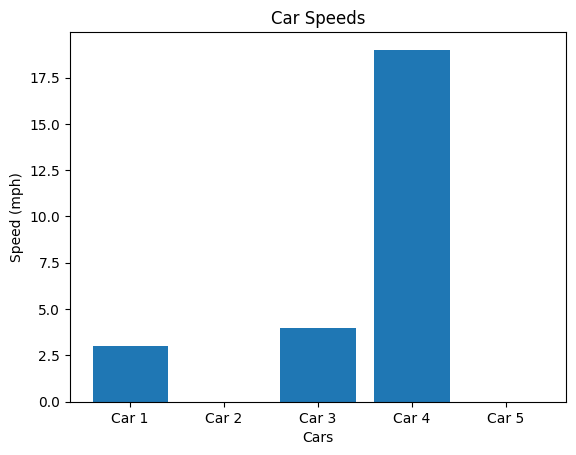

In [2]:
import tkinter as tk
import random
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class RealTimeBarPlotApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Real-Time Bar Plot")

        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas.get_tk_widget().pack()

        self.running = True  # Start real-time update immediately

        self.labels = ['Car 1', 'Car 2', 'Car 3', 'Car 4', 'Car 5']
        self.speeds = [0] * len(self.labels)  # Initialize speeds with zeros

        self.update_plot()  # Initial plot

    def update_plot(self):
        self.ax.clear()
        self.ax.bar(self.labels, self.speeds)
        self.ax.set_xlabel('Cars')
        self.ax.set_ylabel('Speed (mph)')
        self.ax.set_title('Car Speeds')
        self.canvas.draw()

        if self.running:
            # Simulate speed updates (replace with your actual data source)
            for i in range(len(self.speeds)):
                self.speeds[i] += random.randint(-5, 5)
                self.speeds[i] = max(self.speeds[i], 0)  # Ensure speed is non-negative
            self.root.after(1000, self.update_plot)  # Schedule the next update after 1000ms (1 second)

if __name__ == "__main__":
    root = tk.Tk()
    app = RealTimeBarPlotApp(root)
    root.mainloop()
